2. 加载和预处理数据  
创建一个Python文件，比如叫main.py，然后开始编程。首先导入必要的库：

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 设置数据转换
transform = transforms.Compose([
transforms.ToTensor(), # 转换图像为Tensor
transforms.Normalize((0.5,), (0.5,)) # 标准化
])
# 下载训练集和测试集
train_set = torchvision.datasets.MNIST(root='./dataset', train=True, download=False,
transform=transform)
test_set = torchvision.datasets.MNIST(root='./dataset', train=False, download=False,
transform=transform)

# 加载数据
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size =64 ,shuffle=False)

3. 定义神经网络模型  
继续在 main.py 中添加网络模型的定义：

In [25]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(      # (1, 28, 28)
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2, # if stride = 1, padding = (kennel_size - 1)/2 = (5-1)/2
            ), # -> (16, 28, 28)
            nn.ReLU(), # -> (16, 28, 28)
            nn.MaxPool2d(kernel_size=2), # -> (16, 14, 14)
        )
        self.conv2 = nn.Sequential( # (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2), # -> (32, 14, 14)
            nn.ReLU(), 
            nn.MaxPool2d(2), 
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

# # 实例化网络
# net = Net()


In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else cpu)
net = Net()
net.to(device)

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

4. 定义损失函数和优化器

In [27]:
import torch.optim as optim

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01 , momentum=0.9)

train_loss_list = []
# train_acc = []
# test_acc = []

5. 训练网络  
在main.py 中添加训练网络的代码：

In [28]:
def train(epoch):
    net.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data, target = data.to(device), target.to(device)
        output = net(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 99:
            print('Train Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx + 1) * len(data), len(train_loader.dataset),
                100. * (batch_idx + 1) / len(train_loader), train_loss))
    train_loss_list.append(train_loss)
    # train_acc.append(100. * (batch_idx + 1) / len(train_loader))

6. 测试网络  
在main.py中添加测试网络的代码：

In [29]:
def test():
    net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = net(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1 , keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f} , Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

7. 运行训练和测试  
最后，在 main.py 中添加主函数来运行训练和测试过程：

In [30]:
def main():
    for epoch in range (1, 11): # 训练10个epoch
        train(epoch)
        test()
if __name__=='__main__':
    main()

Train Epoch: 1 [6400/60000 (10.66%)]	Loss: 80.305741
Train Epoch: 1 [12800/60000 (21.32%)]	Loss: 99.545022
Train Epoch: 1 [19200/60000 (31.98%)]	Loss: 113.106708
Train Epoch: 1 [25600/60000 (42.64%)]	Loss: 123.428041
Train Epoch: 1 [32000/60000 (53.30%)]	Loss: 132.257699
Train Epoch: 1 [38400/60000 (63.97%)]	Loss: 140.472899
Train Epoch: 1 [44800/60000 (74.63%)]	Loss: 148.873457
Train Epoch: 1 [51200/60000 (85.29%)]	Loss: 154.515693
Train Epoch: 1 [57600/60000 (95.95%)]	Loss: 161.612180

Test set: Average loss: 0.0008 , Accuracy: 9843/10000 (98.43%)

Train Epoch: 2 [6400/60000 (10.66%)]	Loss: 5.092240
Train Epoch: 2 [12800/60000 (21.32%)]	Loss: 9.865304
Train Epoch: 2 [19200/60000 (31.98%)]	Loss: 15.082000
Train Epoch: 2 [25600/60000 (42.64%)]	Loss: 20.949199
Train Epoch: 2 [32000/60000 (53.30%)]	Loss: 26.158099
Train Epoch: 2 [38400/60000 (63.97%)]	Loss: 30.924732
Train Epoch: 2 [44800/60000 (74.63%)]	Loss: 35.906160
Train Epoch: 2 [51200/60000 (85.29%)]	Loss: 40.064521
Train Epoch: 2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


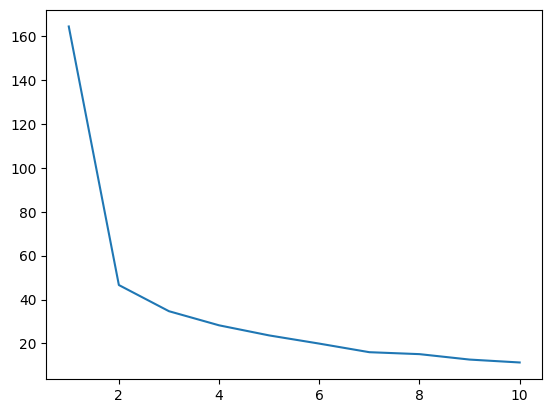

In [31]:
import matplotlib.pyplot as plt

li = [i for i in range(1,11)]
print(li)
plt.plot(li, train_loss_list)
plt.savefig('xunlian.jpg')